In [9]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

#Import data
test_data_imp = pd.read_excel(r'Test_data.xls')
train_data_imp = pd.read_excel(r'Train_data.xls')
val_data_imp = pd.read_excel(r'Validation_data.xls')


#print(test_data_imp)

In [36]:
col = ['Sex', 'Age', 'Tscore', 'Height', 'Weight', 'BMI', 'Cem_ucem', 'TKA', 'side', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP', 'calciumion', 'creatinin', 'eGFR', 'oks_total', 'VAS_aktiv', 'exercise', 'former_alcoholabuse', 'smoker', 'former_smoker']

train_data = train_data_imp[col].to_numpy()
train_labels = train_data_imp['MIG_group'].to_numpy()

val_data = val_data_imp[col].to_numpy()
val_labels = val_data_imp['MIG_group'].to_numpy()

test_data = test_data_imp[col].to_numpy()


rem = ['Sex', 'Age', 'Tscore', 'BMI', 'Cem_ucem', 'TKA', 'side', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP', 'calciumion', 'eGFR', 'oks_total', 'VAS_aktiv', 'exercise', 'former_alcoholabuse', 'smoker', 'former_smoker']
rem2 = ['Tscore', 'TKA', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP']


train_data_rem = train_data_imp[rem].to_numpy()
val_data_rem = val_data_imp[rem].to_numpy()
test_data_rem = test_data_imp[rem].to_numpy()


In [11]:
print(train_data.shape)

print(val_data.shape)

print(test_data.shape)

print(train_labels.shape)

(300, 23)
(50, 23)
(100, 23)
(300,)


In [12]:
zeros = 0
ones = 0
for n in range(len(val_labels)):
    if val_labels[n] == 0:
        zeros = zeros + 1
    if val_labels[n] == 1:
        ones = ones + 1

print(ones, zeros)
zeros = 0
ones = 0

for n in range(len(train_labels)):
    if train_labels[n] == 0:
        zeros = zeros + 1
    if train_labels[n] == 1:
        ones = ones + 1

print(ones, zeros)

15 35
64 236


In [13]:
lab = ['Sex', 'Age', 'Tscore', 'Height', 'Weight', 'BMI', 'Cem_ucem', 'TKA', 'side', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP', 'calciumion', 'creatinin', 'eGFR', 'oks_total', 'VAS_aktiv', 'exercise', 'former_alcoholabuse', 'smoker', 'former_smoker']

train_data_arr = []
val_data_arr = []
test_data_arr = []


from itertools import combinations

#list_combinations = list()
#for n in range(len(lab) + 1):
#    list_combinations += list(combinations(lab, n))
#print(list_combinations)

<AxesSubplot:>

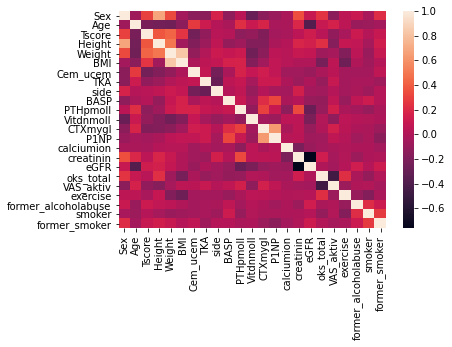

In [14]:
corr = train_data_imp[col].corr()

sns.heatmap(corr, xticklabels=True,yticklabels=True)

In [24]:
pca = PCA(n_components=2)

train_data_PCA = pca.fit_transform(train_data)
val_data_PCA = pca.fit_transform(val_data)
test_data_PCA = pca.fit_transform(test_data)

lda = LinearDiscriminantAnalysis()
train_data_LDA = lda.fit(train_data, train_labels).transform(train_data)
val_data_LDA = lda.fit(val_data, val_labels).transform(val_data)

(300, 1)


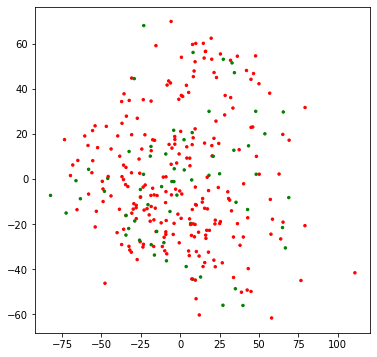

In [26]:
pc1 = train_data_PCA[:, 0]
pc2 = train_data_PCA[:, 1]

fig, ax = plt.subplots(figsize=(6,6))
p = ['red' if l == 0 else 'green' for l in train_labels]
scat = plt.scatter(pc1, pc2, color=p, vmin=0, vmax=200, s=6)
plt.show()

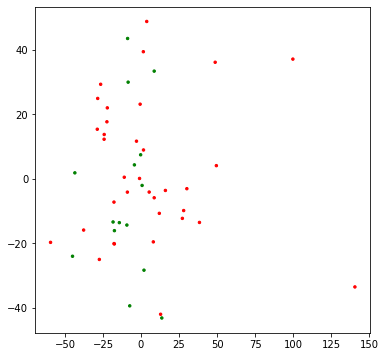

In [20]:
pc1 = val_data_PCA[:, 0]
pc2 = val_data_PCA[:, 1]

fig, ax = plt.subplots(figsize=(6,6))
p = ['red' if l == 0 else 'green' for l in val_labels]
scat = plt.scatter(pc1, pc2, color=p, vmin=0, vmax=200, s=6)
plt.show()

In [27]:
data_set = [train_data, train_data_rem, train_data_PCA, train_data_LDA]
val_set = [val_data, val_data_rem, val_data_PCA, val_data_LDA]

set_name = ["normal", "Removed Features", "PCA", "LDA"]

In [35]:
#Nearest Centroid Classifier

dis = ['euclidean', 'manhattan']

for da in range(4):
    print(set_name[da])
    for d in dis:
        ncc = NearestCentroid(metric=d)
        ncc.fit(data_set[da], train_labels)
        print(str(accuracy_score(val_labels, ncc.predict(val_set[da]))*100))

normal
60.0
48.0
Removed Features
60.0
64.0
PCA
56.00000000000001
56.00000000000001
LDA
84.0
82.0


In [46]:
#K-nearest neighbor
neigh = [1,5,10,15]

for da in range(4):
    print(set_name[da])
    for kn in neigh:
        nn = KNeighborsClassifier(n_neighbors=kn)
        nn.fit(data_set[da], train_labels)
        print(str(accuracy_score(val_labels, nn.predict(val_set[da]))*100))

normal
66.0
66.0
70.0
70.0
Removed Features
72.0
72.0
70.0
70.0
PCA
66.0
70.0
72.0
70.0
LDA
68.0
78.0
76.0
78.0


In [38]:
#Perceptron with Backpropagation
eta0_values = [0.1, 0.01, 0.001, 0.0001]

for da in range(4):
    print(set_name[da])
    for n in eta0_values:
        pcpBP = SGDClassifier(loss="hinge", penalty='l2', learning_rate='constant', eta0=n, max_iter=1000, tol=1e-3, random_state=42)
        pcpBP.fit(data_set[da], train_labels)
        print(str(accuracy_score(val_labels, pcpBP.predict(val_set[da]))*100))

normal
70.0
70.0
30.0
66.0
Removed Features
70.0
68.0
70.0
42.0
PCA
72.0
54.0
70.0
64.0
LDA
70.0
70.0
70.0
70.0


In [42]:
#Support vector machine
from sklearn.svm import LinearSVC

for da in range(4):
    print(set_name[da])
    svcClf = LinearSVC(class_weight='balanced', max_iter=500000)
    svcClf.fit(data_set[da], train_labels)
    print(str(accuracy_score(val_labels, svcClf.predict(val_set[da]))*100))

normal


C:\Users\45311\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


52.0
Removed Features


C:\Users\45311\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


54.0
PCA
52.0
LDA
84.0


In [44]:
#Multi-Layer Perceptron
layers = [256, 128, 64, 32, 16]
layers2 = [128, 64, 32, 16, 8]
layers3 = [64, 32, 16, 8, 4]

for da in range(4):
    print(set_name[da])
    for t in range(5):
        net = MLPClassifier(solver='lbfgs', alpha=1e-5, learning_rate="constant", hidden_layer_sizes=(layers[t],layers2[t], layers3[t] ), random_state=42, max_iter=5000, learning_rate_init=0.001, activation='relu')
        net.fit(data_set[da], train_labels)
        print(str(accuracy_score(val_labels, net.predict(val_set[da]))*100))

normal
62.0
66.0
57.99999999999999
57.99999999999999
66.0
Removed Features
64.0
68.0
60.0
70.0
70.0
PCA
60.0
60.0
62.0
66.0
70.0
LDA
78.0
76.0
76.0
78.0
80.0


In [ ]:

co = 0
ci = 0
ct = 0
cn = 0
cv = 0

for k in range(32):
    for t in range(16):
        for v in range(8):
            neunet = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(k+1,t+1,v+1), random_state=42, max_iter=200, learning_rate_init=0.001)
            neunet.fit(train_data, train_labels)
            if co < accuracy_score(val_labels, neunet.predict(val_data))*100:
                co = accuracy_score(val_labels, neunet.predict(val_data))*100
                ci = k
                ct = t
                cv = v
                neunet_pred = neunet.predict(test_data)

print(co, ci, ct, cv)


print(neunet_pred)

C:\Users\45311\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\45311\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\45311\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

In [ ]:
#To CSV for kaggle comp
t = np.array(test_data_imp['Number'].to_list())
p = np.array(neunet_pred)
data = {'ID': t,'Label': p}


pre = pd.DataFrame.from_dict(data)
print(pre)
pre.to_csv(r'predict.csv', index_label=False, index=False, header=True, sep=',')


     ID  Label
0     1      0
1     2      0
2     3      1
3     4      1
4     5      1
..  ...    ...
95   96      0
96   97      1
97   98      0
98   99      0
99  100      0

[100 rows x 2 columns]
